# Training v2 - Cross Validation 

In [1]:
# load in data

import pandas as pd
import pickle

with open('data/gdsc.pkl', 'rb') as f:
    gdsc1 = pickle.load(f)
    gdsc1_drugdata = pickle.load(f)
    gdsc2 = pickle.load(f)
    gdsc2_drugdata = pickle.load(f)

with open('data/ccle_expression.pkl', 'rb') as f:
    gene_entrez = pickle.load(f)
    ccle = pickle.load(f)

with open('data/ccle_sample_info.pkl', 'rb') as f:
    ccle_sample_info = pickle.load(f)

with open('data/preprocessed/processed_data1.pkl', 'rb') as f:
    xtrain = pickle.load(f)
    ylabel = pickle.load(f)
    ylabel_binary = pickle.load(f)
    index_to_sanger = pickle.load(f)

palbo = gdsc1.loc[gdsc1['DRUG_NAME'] == 'Palbociclib']
ln_ic50 = palbo['LN_IC50']
celllines = palbo['SANGER_MODEL_ID']

FileNotFoundError: [Errno 2] No such file or directory: 'data/preprocessed/processed_data1.pkl'

In [ ]:
from random import shuffle


test_size = 100

shuffle(xtrain)
shuffle(ylabel)

x_test = xtrain[:test_size]
partial_x_train = xtrain[test_size:]

y_test = ylabel_binary[:test_size]
partial_y_train = ylabel_binary[test_size:]

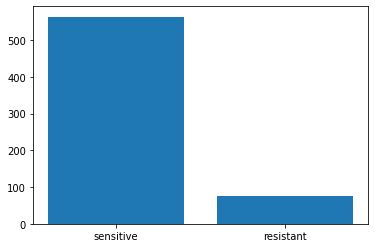

In [ ]:
# visualise ylabels, ytests as bar plots 

import matplotlib.pyplot as plt

plt.bar(['sensitive', 'resistant'], [sum(ylabel_binary), len(ylabel_binary) - sum(ylabel_binary)])
plt.show()


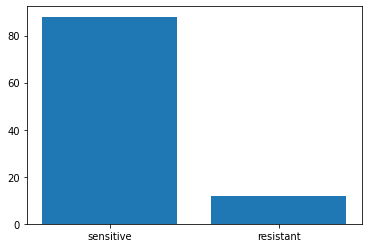

In [ ]:
import matplotlib.pyplot as plt

plt.bar(['sensitive', 'resistant'], [sum(y_test), len(y_test) - sum(y_test)])
plt.show()

In [ ]:
from keras import models
from keras import layers
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np

def create_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(len(gene_entrez)-1,)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    return model 


## Cross-validation 

In [ ]:
# fixed random seed for reproducibility
seed = 10
np.random.seed(seed)

model = KerasClassifier(model=create_model, epochs=20, batch_size=10, verbose=0)
# evaluate using 5-fold cross validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
results = cross_val_score(model, partial_x_train, partial_y_train, cv=kfold)
print(results.mean())
    

0.8814814814814815


## Test data evaluation

In [ ]:
# import matplotlib.pyplot as plt
model = KerasClassifier(model=create_model, epochs=20, batch_size=10, verbose=0)
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=10, verbose=0)
test_pred = model.predict(x_test)

print(test_pred)
print(y_test)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


Accuracy:  0.88
AUC:  0.5


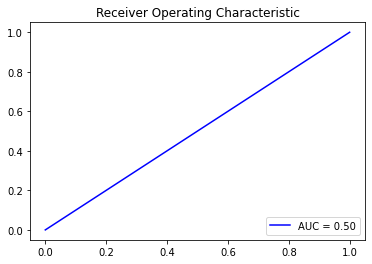

In [ ]:
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt

acc = metrics.accuracy_score(y_test, test_pred)
print("Accuracy: ", acc)

fpr, tpr, threshold = metrics.roc_curve(y_test, test_pred)

roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)



# Plot ROC 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.show()
